<a href="https://colab.research.google.com/github/Farmaan-N/Wind_Power_Generation_Forecasting/blob/main/WindPowerGenerationPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WEEK **1**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [3]:
# importing all the necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical python - linear algebra
import matplotlib.pyplot as plt # visualization lib
import seaborn as sns
from sklearn.model_selection import train_test_split # sklearn - ML
from sklearn.preprocessing import StandardScaler # scaling

In [4]:
# Load the csv (Dataset) files
location1 = pd.read_csv('/content/drive/MyDrive/WindPowerGeneration_Edunet_Intern/Location1.csv')
location2 = pd.read_csv('/content/drive/MyDrive/WindPowerGeneration_Edunet_Intern/Location2.csv')
location3 = pd.read_csv('/content/drive/MyDrive/WindPowerGeneration_Edunet_Intern/Location3.csv')
location4 = pd.read_csv('/content/drive/MyDrive/WindPowerGeneration_Edunet_Intern/Location4.csv')

In [5]:
location1.head(3)


,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214


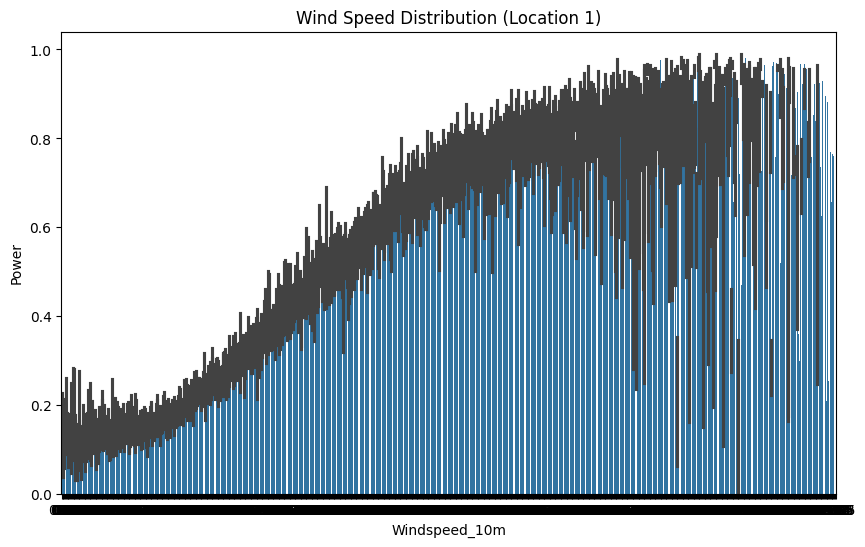

In [6]:
# bar plot for the location1

plt.figure(figsize=(10, 6))
sns.barplot(x='windspeed_10m', y='Power', data=location1)
plt.title('Wind Speed Distribution (Location 1)')
plt.xlabel('Windspeed_10m')
plt.ylabel('Power')
plt.show()


In [7]:
# Add a new column to identify the location
location1['Location'] = 'Location1'
location2['Location'] = 'Location2'
location3['Location'] = 'Location3'
location4['Location'] = 'Location4'

# Concatenate to a dataframe
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)

merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,Location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,Location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,Location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,Location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,Location1


In [8]:
# saving the merged dataset to a new CSV file
merged_data.to_csv('merged_locations.csv', index=False)

In [9]:
# To see the basic information about the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  Location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [10]:
# To check the statistics of Dataset
merged_data.describe()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
count,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000,175200.000000
mean,46.655994,70.155291,36.516241,4.157639,6.879334,201.589446,201.539070,8.038205,0.303429
std,22.012738,17.326678,20.933153,2.012682,3.043964,99.639040,100.683777,3.617488,0.257325
min,-31.200000,9.000000,-36.200000,0.000000,0.000000,1.000000,0.000000,0.500000,0.000000
25%,30.200000,57.000000,21.900000,2.630000,4.700000,130.000000,129.000000,5.300000,0.087700
50%,46.900000,72.000000,36.200000,3.850000,6.680000,211.000000,211.000000,7.600000,0.233100
75%,65.300000,84.000000,54.600000,5.380000,8.800000,288.000000,290.000000,10.300000,0.474200
max,101.700000,100.000000,78.700000,18.530000,24.590000,360.000000,360.000000,29.200000,0.999400


In [11]:
# To check the statistics of Dataset
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [12]:
# Check the missing values
merged_data.isnull()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
175195,False,False,False,False,False,False,False,False,False,False,False
175196,False,False,False,False,False,False,False,False,False,False,False
175197,False,False,False,False,False,False,False,False,False,False,False
175198,False,False,False,False,False,False,False,False,False,False,False


In [13]:
merged_data.isnull().sum()

,0
Time,0
temperature_2m,0
relativehumidity_2m,0
dewpoint_2m,0
windspeed_10m,0
windspeed_100m,0
winddirection_10m,0
winddirection_100m,0
windgusts_10m,0
Power,0


In [14]:
# To check the duplicated rows
merged_data.duplicated().sum()

np.int64(0)

In [15]:
# Encode the categorical variables
merged_data = pd.get_dummies(merged_data, columns=['Location'], drop_first=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [16]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'Location_Location2',
       'Location_Location3', 'Location_Location4'],
      dtype='object')

In [17]:
merged_data.drop('Time', axis=1, inplace=True)

In [18]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,Location_Location2,Location_Location3,Location_Location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


# **WEEK 2**


In [19]:
# Extract numerical columns from the merged dataset
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns


Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

In [20]:
# Check shape of the dataset
merged_data.shape


(175200, 12)

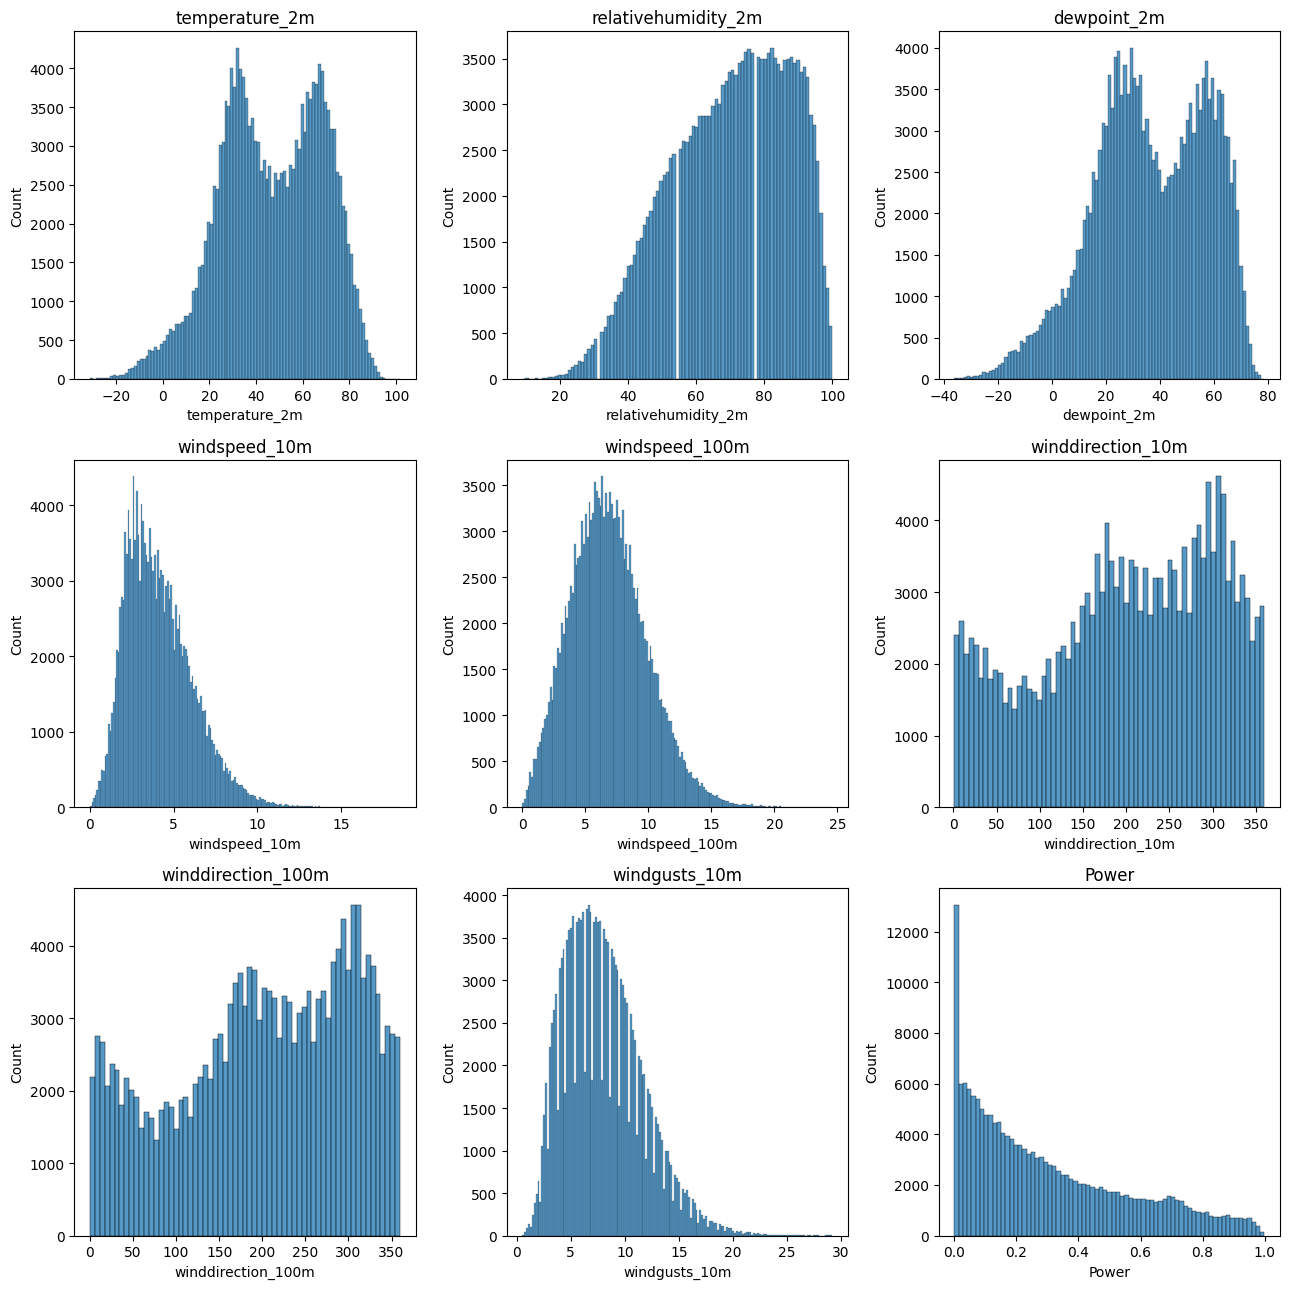

In [21]:
# Plot histograms to check distribution of each numerical column
fig, axes = plt.subplots(3, 3, figsize=(13, 13))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()


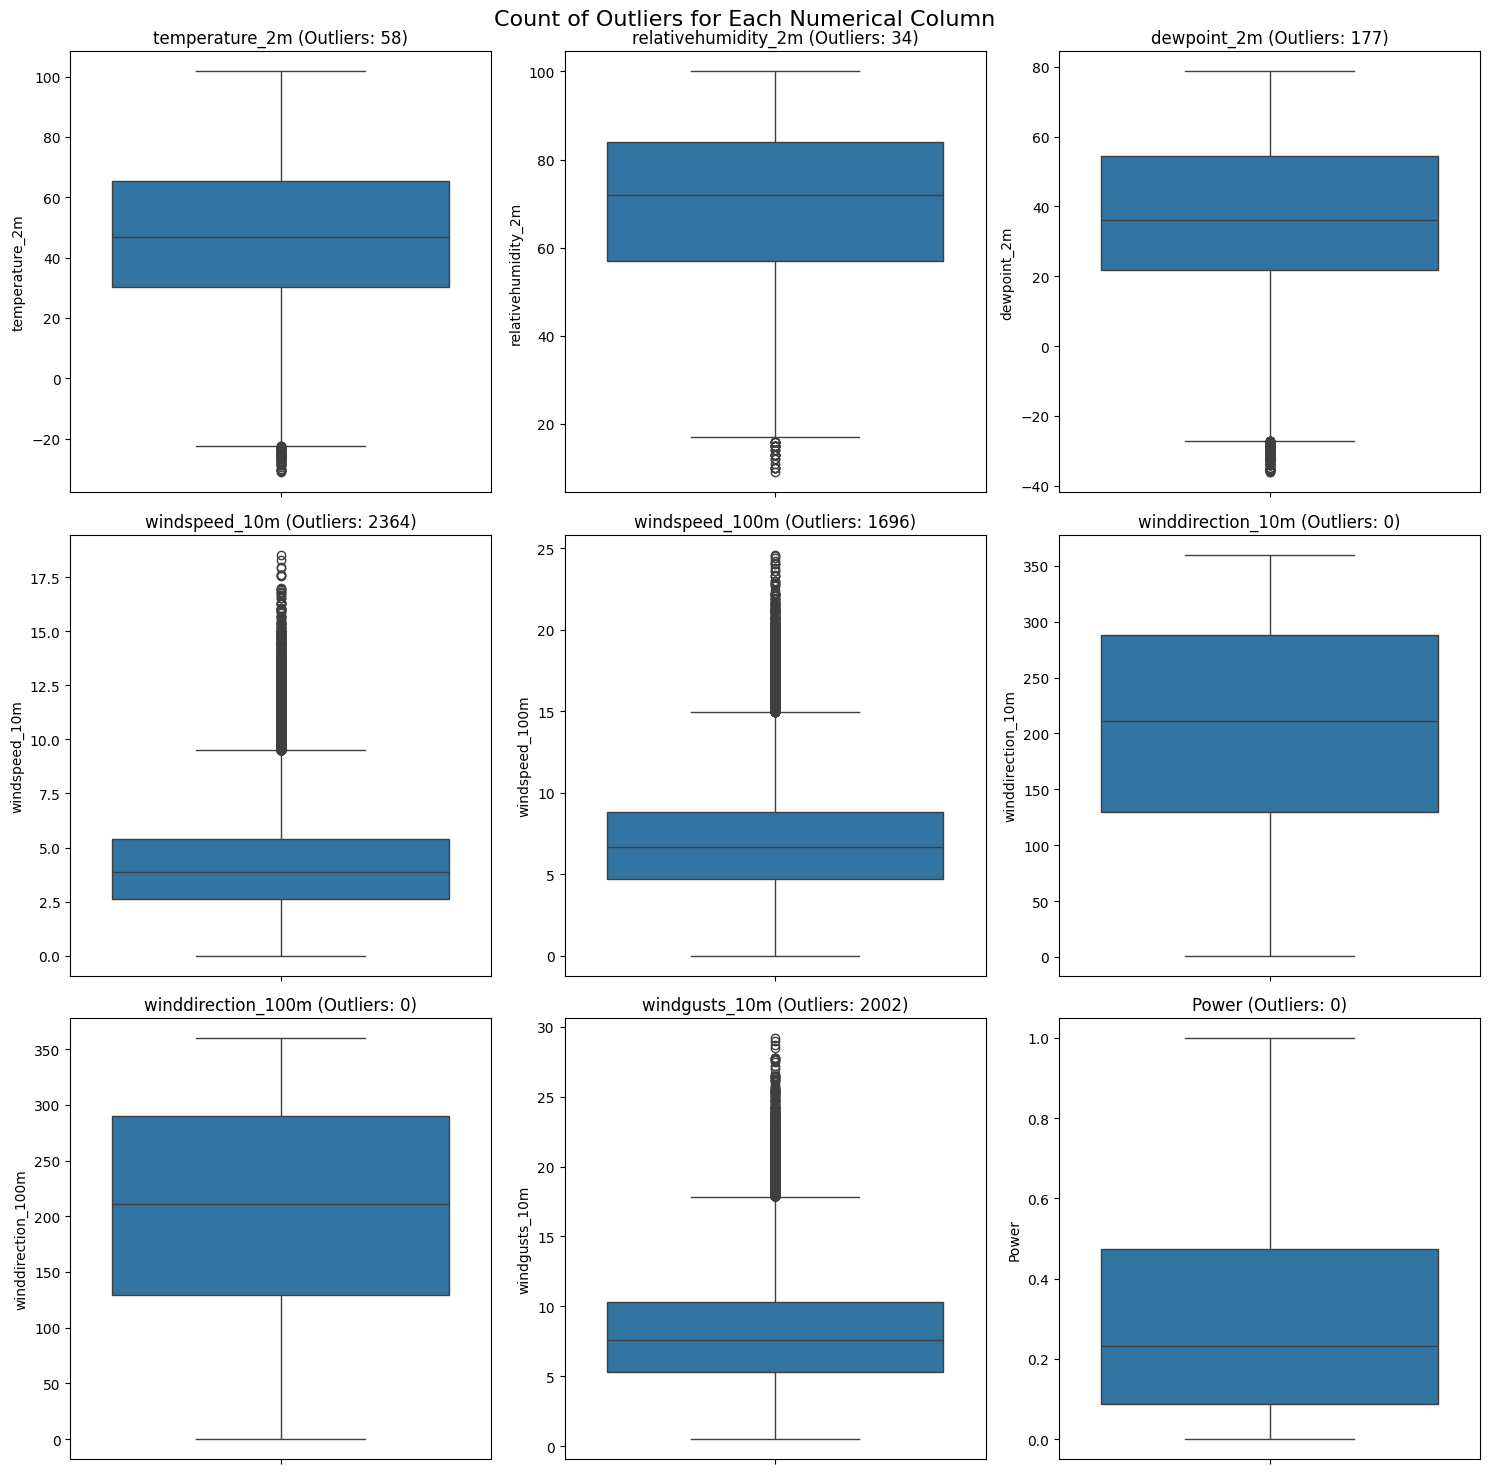

In [22]:
# Plot boxplots and show count of outliers for each numerical column
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()
fig.suptitle('Count of Outliers for Each Numerical Column', fontsize=16)
for i, col in enumerate(numerical_columns):
    # Calculate IQR
    Q1 = merged_data[col].quantile(0.25)
    Q3 = merged_data[col].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier condition
    outliers = merged_data[(merged_data[col] < Q1 - 1.5 * IQR) | (merged_data[col] > Q3 + 1.5 * IQR)]
    outlier_count = outliers.shape[0]

    # Plot boxplot
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(f'{col} (Outliers: {outlier_count})')

plt.tight_layout()
plt.show()


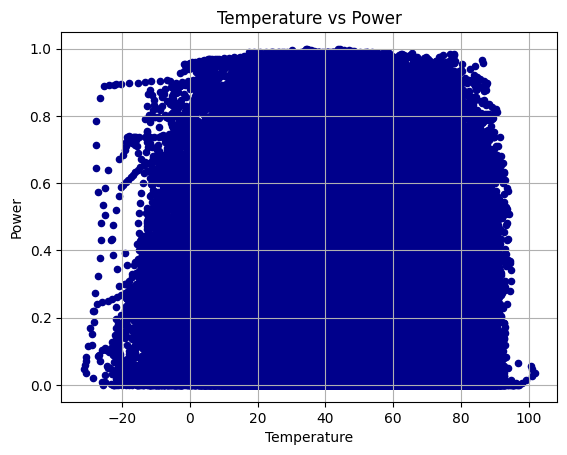

In [23]:
# Scatter plot to analyze relationship between temperature and power
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()


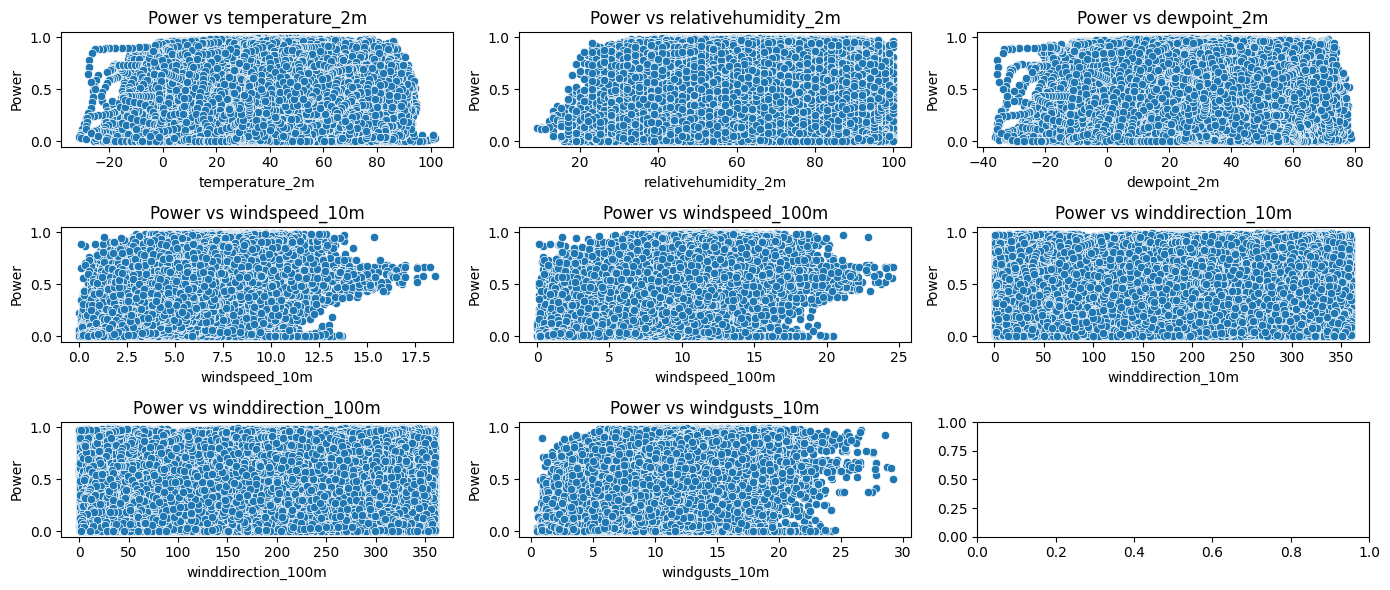

In [24]:
# Scatter plots of each feature (excluding 'Power') against Power
fig, axes = plt.subplots(3, 3, figsize=(14, 6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'Power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()


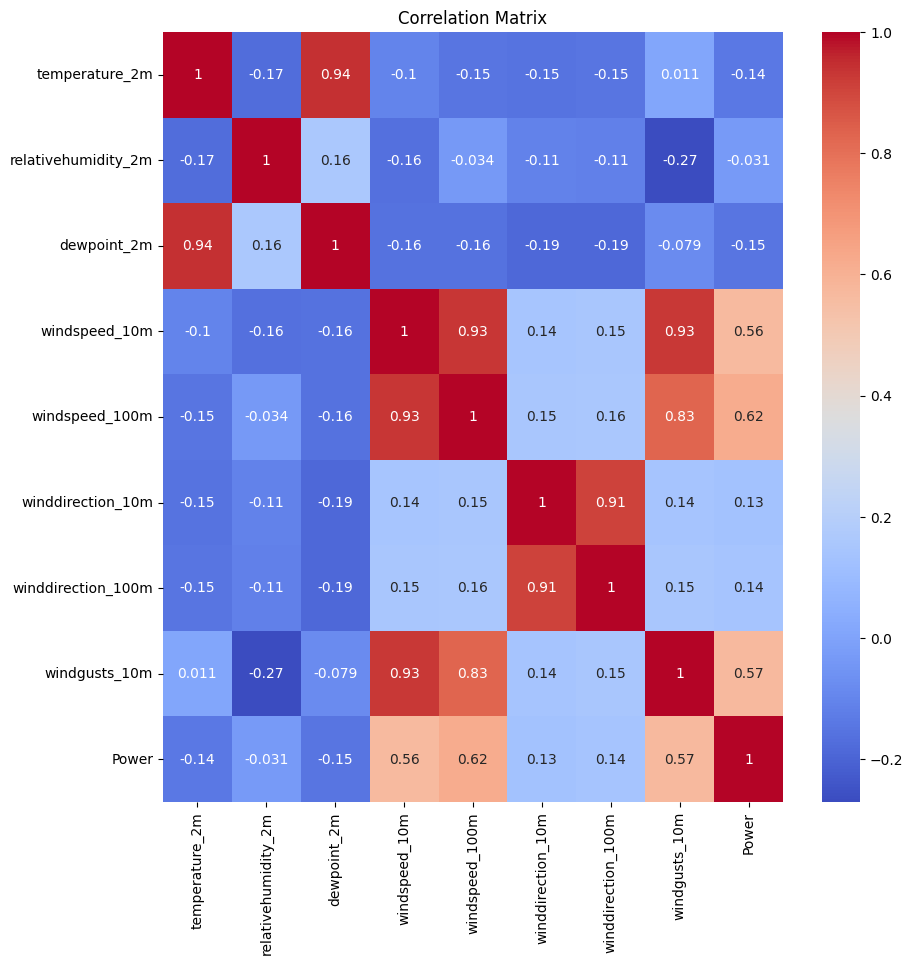

In [25]:
# Correlation heatmap for numerical features
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# WEEK 3 --- Data modeling


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Feature and target selection
X = merged_data.drop('Power', axis=1)
y = merged_data['Power']

# Split into training and testing sets (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


``` Linear Regression Model ```

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R Squared Score: {r2}')


Mean Absolute Error: 0.13765858053375127
Mean Squared Error: 0.03254230698731513
R Squared Score: 0.5127994646410983


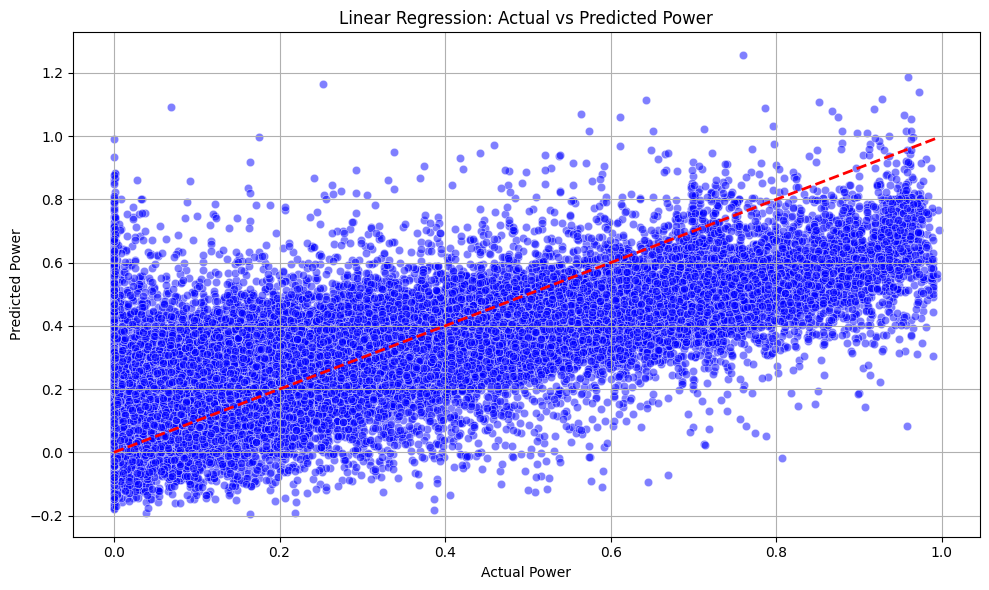

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Linear Regression: Actual vs Predicted Power')
plt.grid(True)
plt.tight_layout()
plt.show()


```  Random For Regressor ```

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Train Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train[:50000], y_train[:50000])

# Predict and evaluate
y_pred_rf = rf_model.predict(X_test)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'MAE: {mae_rf}')
print(f'MSE: {mse_rf}')
print(f'R2 Score: {r2_rf}')


MAE: 0.11517464677511416
MSE: 0.024689648215622802
R2 Score: 0.6303639495146067


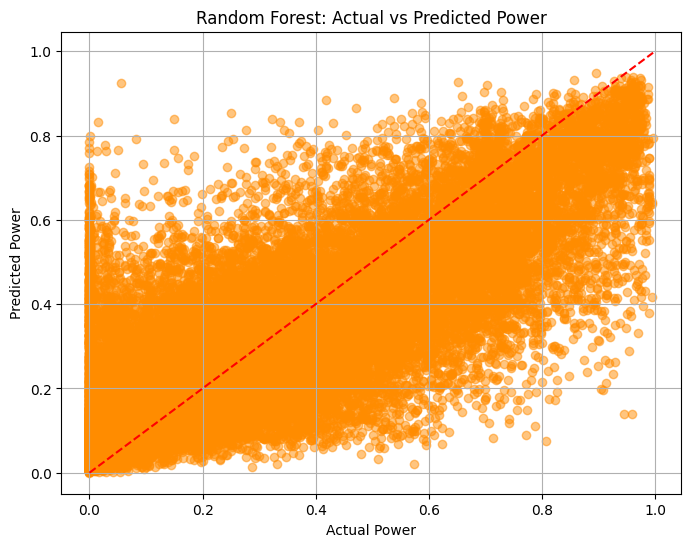

In [35]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.5, color='darkorange')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Random Forest: Actual vs Predicted Power')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Reference line
plt.show()


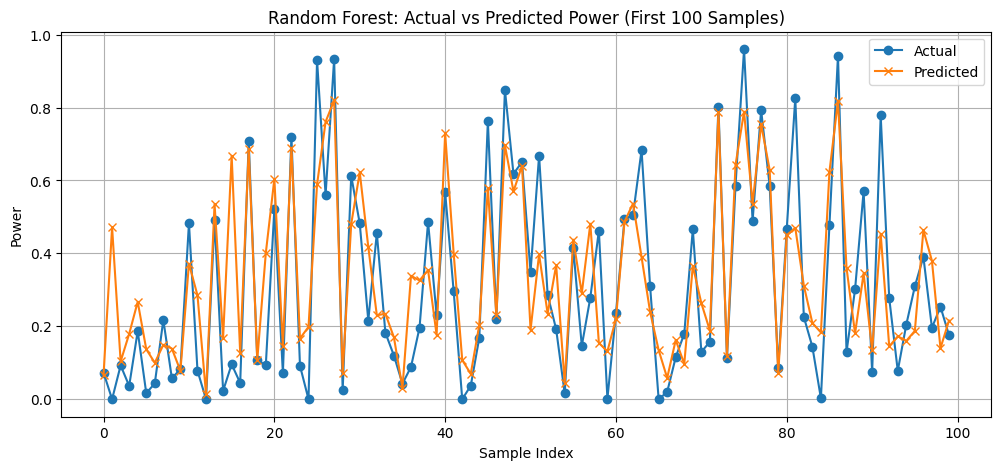

In [38]:
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred_rf[:100], label='Predicted', marker='x')
plt.title('Random Forest: Actual vs Predicted Power (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()


``` XGBoost Regressor ```

In [36]:
from xgboost import XGBRegressor

# Train XGBoost model
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

# Predict and evaluate
y_pred_xgb = xgb_model.predict(X_test)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGB MAE: {mae_xgb}')
print(f'XGB MSE: {mse_xgb}')
print(f'XGB R2: {r2_xgb}')


XGB MAE: 0.11572619130940615
XGB MSE: 0.024946639423317377
XGB R2: 0.6265164578779464


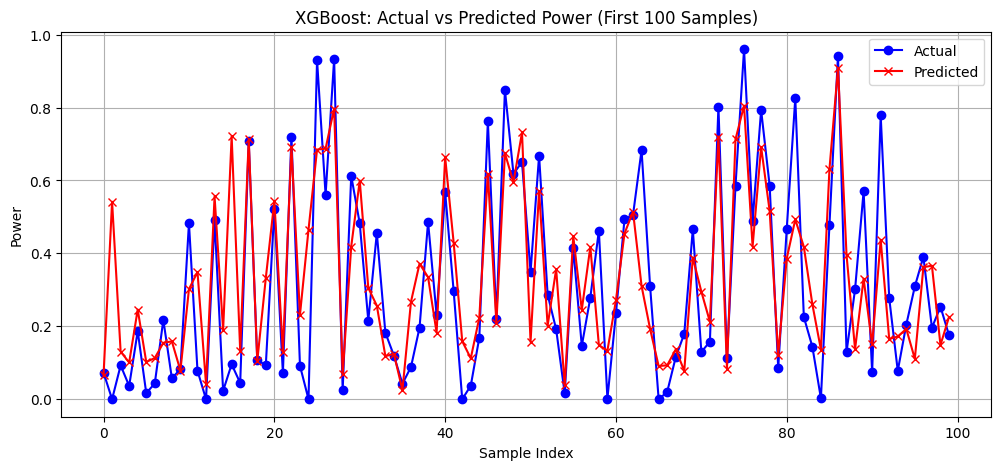

In [40]:
# Line plot for actual vs predicted values (XGBoost)
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o', color='blue')
plt.plot(y_pred_xgb[:100], label='Predicted', marker='x', color='red')
plt.title('XGBoost: Actual vs Predicted Power (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()


``` Hyperparameter Tuning with GridSearchCV ```

In [48]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

# Define a reduced parameter grid for faster tuning
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# GridSearchCV with XGBoost
grid_search = GridSearchCV(
    estimator=XGBRegressor(random_state=42, verbosity=0),
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=3,
    n_jobs=-1,
    verbose=1  # Optional: progress logging
)

# Fit the model and output results
grid_search.fit(X_train, y_train)
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MAE: {-grid_search.best_score_:.2f}')


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
Best MAE: 0.12


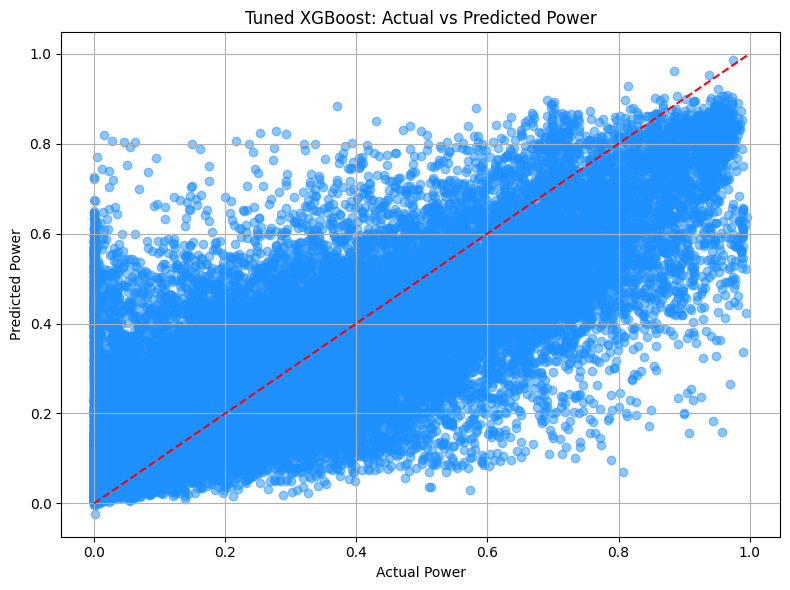

In [50]:
# Predict using the best model from GridSearch
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

# Scatter plot: Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_tuned, alpha=0.5, color='dodgerblue')
plt.xlabel('Actual Power')
plt.ylabel('Predicted Power')
plt.title('Tuned XGBoost: Actual vs Predicted Power')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.tight_layout()
plt.show()


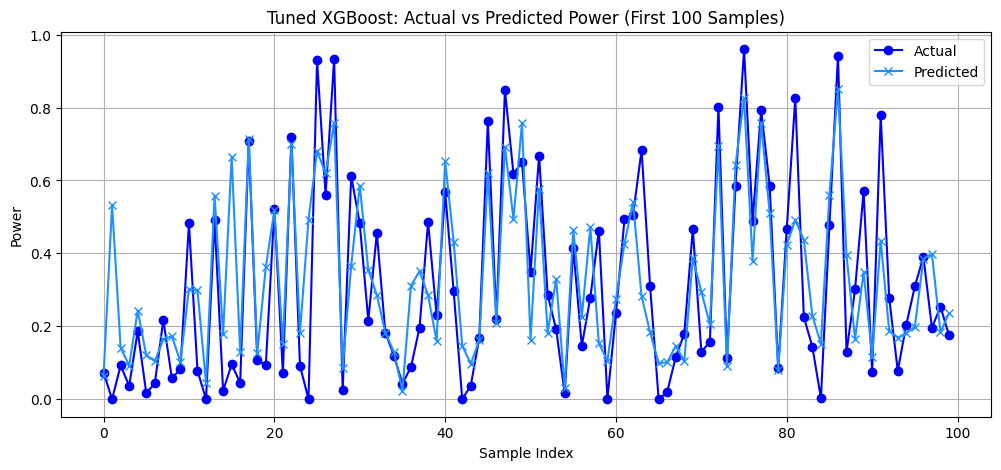

In [51]:
#Line plot
plt.figure(figsize=(12, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o', color='blue')
plt.plot(y_pred_tuned[:100], label='Predicted', marker='x', color='dodgerblue')
plt.title('Tuned XGBoost: Actual vs Predicted Power (First 100 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()
